In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pyreadr
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from numpy import linalg as LA

### Spreads

$\frac{dS^i}{S^i} = \sum_{l} \beta_{i,l} \frac{dI^l}{I^l} + dZ^i$

In [2]:
# file path for SP500 returns data
filepath = 'data/sp500_data.csv'

df = pd.read_csv(filepath)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.set_index('date',inplace=True)

In [3]:
# 442 stock returns over 5 years - 1258 days
print('shape: {}'.format(df.shape))
# last date
print('last date: {}'.format(df.index[-1]))

shape: (1259, 442)
last date: 2019-10-04


In [4]:
# get rid of _price, change to pct and clean
col_list = []
for i in df.columns:
    col_list.append(i.split('_', 1)[0])
df.columns = col_list

df = df.pct_change()
df = df.dropna(axis=0)

In [5]:
import glob

path = '/Users/zachariemartin/Desktop/School/Projects/summer2019/2/sum19/data/etf data'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df_ = pd.read_csv(filename, usecols=[4], header='infer')
    li.append(df_)

etf_df = pd.concat(li, axis=1, ignore_index=True)

In [6]:
etf_df = etf_df.pct_change()
etf_df = etf_df.dropna(axis=0)

In [7]:
# 9 etf returns over 5 years - 1258 days

x = etf_df.values
x.shape

(1258, 9)

In [8]:
# throw out intercept

from sklearn import linear_model

# regress on each stocks returns, save residuals
reg = linear_model.LinearRegression(fit_intercept=False)
x = etf_df.values 
df_residuals = pd.DataFrame(columns=df.columns)

for i in range(df.shape[1]):
    y = df.iloc[:,i].values.reshape(-1,1)
    reg.fit(x,y)
    w = reg.coef_
    b = reg.intercept_
    df_residuals.iloc[:,i] = (y-(x@w.T + b)).flatten()

In [9]:
# compare this cell and the one below
df_residuals.head()

,AAPL,ACN,AMG,AMT,ANTM,BBBY,BK,CAH,DE,DLTR,...,MLM,MSFT,NFLX,O,PCAR,SRCL,TGNA,TXT,V,WU
0,0.006154,-0.007869,0.006762,-0.000863,0.003066,0.015486,-0.005636,-0.001046,-0.007980,0.011531,...,-0.002786,0.002844,0.003816,-0.001981,0.001481,0.006961,0.007732,-0.004447,-0.002629,-0.002995
1,0.003695,-0.005921,0.001593,0.003315,-0.004218,0.001876,-0.000052,0.005139,0.001570,-0.002499,...,-0.009441,0.006164,0.001839,0.007510,0.017002,-0.002338,-0.009323,-0.003535,0.000568,0.005938
2,0.014483,-0.002763,-0.000345,0.008392,0.013893,0.019873,-0.010822,0.005232,0.021588,0.009543,...,0.002278,-0.003077,0.015848,0.026125,0.004183,0.012287,-0.016860,-0.005652,-0.003823,-0.012540
3,0.031347,-0.002469,0.000147,0.000180,-0.011363,-0.021116,-0.003570,0.001655,0.016587,-0.014162,...,-0.020429,-0.011139,0.005169,-0.010419,0.000114,-0.003311,-0.015888,0.009501,0.007079,-0.000620
4,-0.002215,0.006749,-0.004672,-0.007954,0.000460,0.001008,-0.003530,0.004324,0.025657,0.009701,...,-0.016232,0.001532,-0.004094,0.008881,0.004517,0.013349,-0.006884,-0.008634,0.009201,0.005154


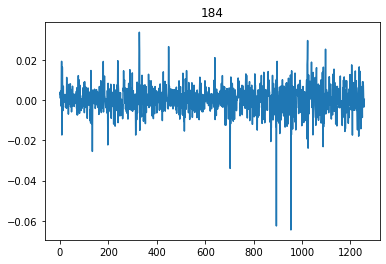

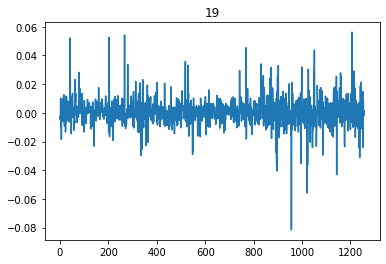

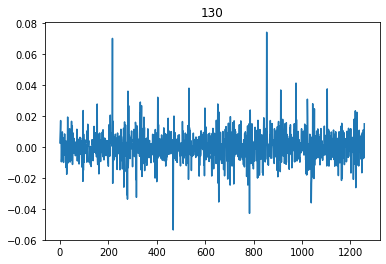

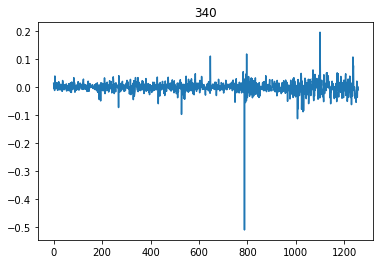

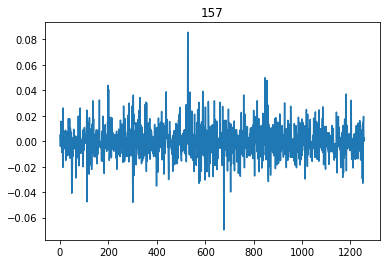

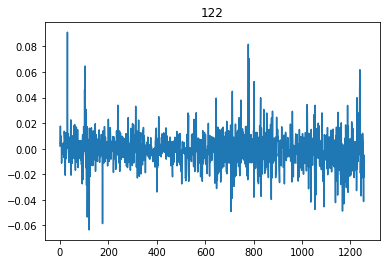

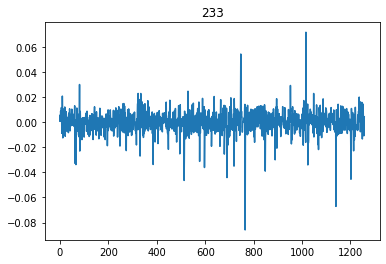

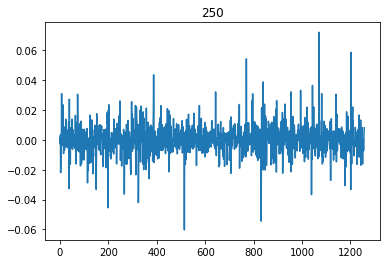

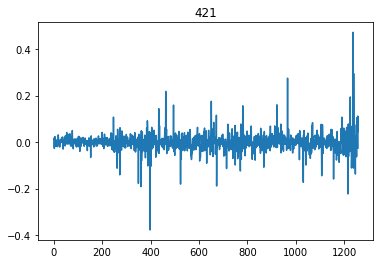

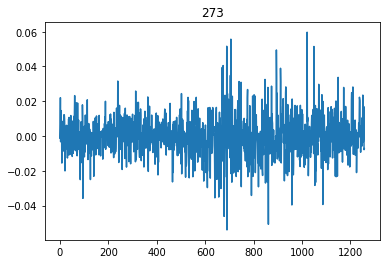

In [10]:
#compare 10 random plots
x = np.random.randint(low=0,high=df_residuals.shape[1],size=10)

if True:
    for i in x:
        plt.figure(i)
        plt.plot(df_residuals.iloc[:,i])
        plt.title(i)
        plt.savefig('non-integrated.png')

In [11]:
# compare this cell and the one above
df_residuals_cumsum = df_residuals.cumsum(axis=0)
df_residuals_cumsum.head()

,AAPL,ACN,AMG,AMT,ANTM,BBBY,BK,CAH,DE,DLTR,...,MLM,MSFT,NFLX,O,PCAR,SRCL,TGNA,TXT,V,WU
0,0.006154,-0.007869,0.006762,-0.000863,0.003066,0.015486,-0.005636,-0.001046,-0.007980,0.011531,...,-0.002786,0.002844,0.003816,-0.001981,0.001481,0.006961,0.007732,-0.004447,-0.002629,-0.002995
1,0.009849,-0.013791,0.008355,0.002453,-0.001152,0.017361,-0.005689,0.004093,-0.006410,0.009033,...,-0.012227,0.009008,0.005655,0.005529,0.018483,0.004623,-0.001590,-0.007982,-0.002061,0.002943
2,0.024332,-0.016553,0.008010,0.010845,0.012740,0.037234,-0.016510,0.009325,0.015178,0.018575,...,-0.009949,0.005931,0.021503,0.031654,0.022665,0.016909,-0.018450,-0.013634,-0.005885,-0.009597
3,0.055679,-0.019023,0.008157,0.011025,0.001377,0.016118,-0.020080,0.010980,0.031765,0.004413,...,-0.030378,-0.005208,0.026672,0.021235,0.022780,0.013598,-0.034338,-0.004133,0.001195,-0.010217
4,0.053464,-0.012273,0.003485,0.003070,0.001837,0.017126,-0.023611,0.015304,0.057422,0.014114,...,-0.046610,-0.003675,0.022577,0.030115,0.027297,0.026947,-0.041223,-0.012767,0.010396,-0.005062


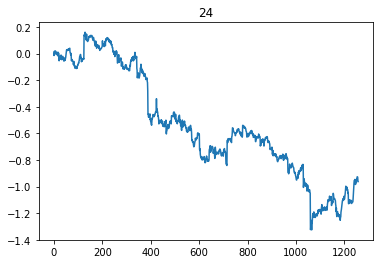

In [22]:
#compare 40 plots
x = np.random.randint(low=0,high=df_residuals.shape[1],size=1)

if True:
    for i in x:
        plt.figure(i)
        plt.plot(df_residuals_cumsum.iloc[:,i])
        plt.title(i)
        plt.savefig('integrated.png')

In [13]:
df_residuals.set_index(df.index,inplace=True)

In [14]:
from statsmodels.tsa.stattools import adfuller

df_df = pd.DataFrame(columns=['ADF Statistic','p-value','n lags used'],index=df_residuals_cumsum.columns)

# test "integrated" residuals for stationarity and return adf statistic and p-value, columns 0 and 1 respectively
for i in range(df_residuals.shape[1]):
    result = adfuller(df_residuals_cumsum.iloc[:,i])
    df_df.iloc[i,0] = result[0]
    df_df.iloc[i,1] = result[1]
    df_df.iloc[i,2] = result[2]


In [15]:
# check for significance at 5%
np.where(df_df.iloc[:,1] > .05)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 103, 105, 106,
        107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
        120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173,
        175, 176, 177, 178, 179, 180, 182, 183, 184

In [16]:
df_df

,ADF Statistic,p-value,n lags used
AAPL,-2.31643,0.166723,1
ACN,-1.98469,0.293325,0
AMG,1.06065,0.994866,0
AMT,0.486867,0.984468,6
ANTM,-1.12704,0.704171,0
BBBY,-0.535846,0.884829,0
BK,-2.45283,0.127376,0
CAH,-0.776979,0.825791,1
DE,-0.586112,0.874089,0
DLTR,-2.59694,0.0936318,0


In [17]:
# save results to csv
path = 'data/zprocess_data.csv'
df_residuals.to_csv(path)

In [18]:
# plot spreads
df_z = pd.read_csv('/Users/zachariemartin/Desktop/School/Projects/summer2019/2/sum19/data/zprocess_data.csv')

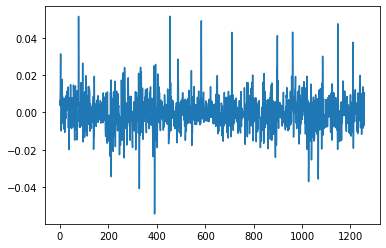

In [19]:
plt.plot(df_z.iloc[:,1])

In [20]:
df_z.shape[1]+1

444

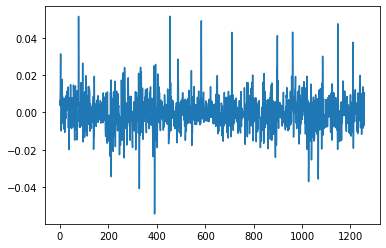

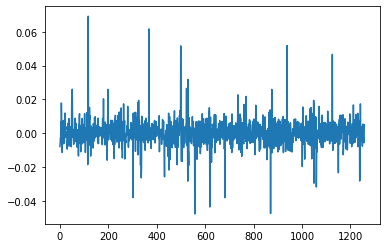

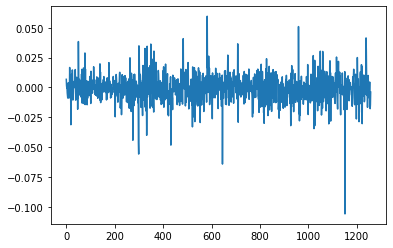

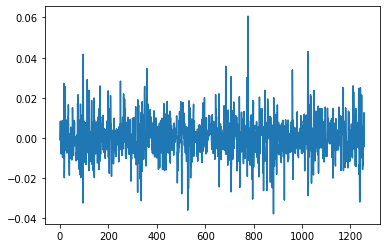

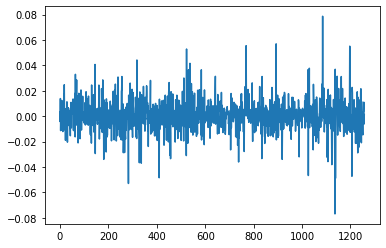

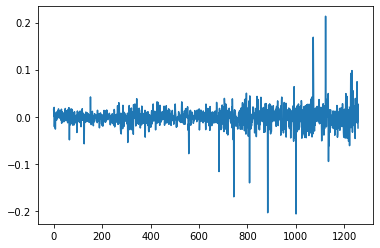

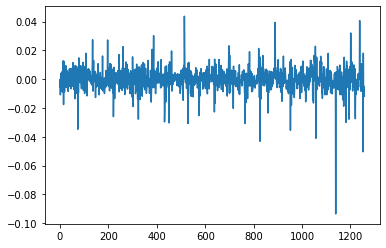

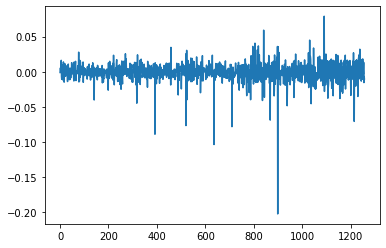

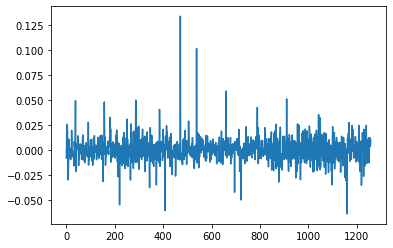

In [21]:
# plot "returns" to see if they make sense   
if True:
    for i in range(1,10):
        plt.figure(i)
        plt.plot(df_z.iloc[:,i])